In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import wfdb
import sklearn

In [25]:
data_path = 'dataset/'

patients for pts
file_path for file
person for pt

In [26]:
patients = ['100','101','102','103','104','105','106','107',
       '108','109','111','112','113','114','115','116',
       '117','118','119','121','122','123','124','200',
       '201','202','203','205','207','208','209','210',
       '212','213','214','215','217','219','220','221',
       '222','223','228','230','231','232','233','234']

In [27]:
df=pd.DataFrame()

In [28]:
for person in patients:
    file_path=data_path+person
    annotation=wfdb.rdann(file_path,"atr")
    sym=annotation.symbol
    values,counts=np.unique(sym,return_counts=True)
    df_sub=pd.DataFrame({'sym':values, 'val':counts, 'pt':[person]*len(counts)})
    df=pd.concat([df,df_sub],axis=0)

In [29]:
#len(df.pt.unique())
len(patients)

48

In [30]:
file_path=data_path+"100"
annotation=wfdb.rdann(file_path,"atr")
sym=annotation.symbol
print(sym)
values,counts=np.unique(sym,return_counts=True)
df_sub=pd.DataFrame({'sym':values, 'val':counts})
df_sub["pt"]="100"
df_sub

['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

,sym,val,pt
0,+,1,100
1,A,33,100
2,N,2239,100
3,V,1,100


In [23]:
d_N=df.loc[df["sym"].isin(["P","/","f","u"]),["val","pt"]]
sum(d_N["val"])

8010

In [13]:
distribution=df["sym"].value_counts()

In [12]:
df["sym"].unique()

array(['+', 'A', 'N', 'V', 'Q', '|', '~', '/', 'f', 'F', 'j', 'x', 'L',
       'a', 'J', 'R', '!', 'E', '[', ']', 'S', '"', 'e'], dtype=object)

In [13]:
frequency=df.groupby('sym').val.sum().sort_values(ascending = False)
frequency

sym
N    75052
L     8075
R     7259
V     7130
/     7028
A     2546
+     1291
f      982
F      803
~      616
!      472
"      437
j      229
x      193
a      150
|      132
E      106
J       83
Q       33
e       16
[        6
]        6
S        2
Name: val, dtype: int64

In [66]:
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?',"f","/"]
#abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']
abnormal = ['V','A','F','j','a','E','J','e','S']
normal=["N","L","R"]
len(nonbeat),len(abnormal)

(26, 9)

In [67]:
df['cat'] = -1   # nonbeat
df.loc[df.sym.isin(normal),'cat'] = 0 # normal
df.loc[df.sym.isin(abnormal), 'cat'] = 1 #abnormal 

In [68]:
df.groupby('cat').val.sum()

cat
-1    11196
 0    90386
 1    11065
Name: val, dtype: int64

In [69]:
def load_ecg(file):
    # load the ecg
    # example file: 'mit-bih-arrhythmia-database-1.0.0/101'
    
    # load the ecg
    record = wfdb.rdrecord(file)
    # load the annotation
    annotation = wfdb.rdann(file, 'atr')
    
    # extract the signal
    p_signal = record.p_signal # represent both leads
    
    # verify frequency is 360
    assert record.fs == 360, 'sample freq is not 360'
    
    # extract symbols and annotation index
    atr_sym = annotation.symbol # the type of symbol
    atr_sample = annotation.sample # the sample_duration
    
    return p_signal, atr_sym, atr_sample

In [70]:
file = data_path + patients[0]

In [71]:
p_signal, atr_sym, atr_sample = load_ecg(file)

In [72]:
len(atr_sym)

2274

In [73]:
atr_sample

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [74]:
len(p_signal)

650000

In [75]:
values, counts = np.unique(sym, return_counts=True)
for v,c in zip(values, counts):
    print(v,c)
#there is an error here the error is it takes last 234 signal

+ 1
A 33
N 2239
V 1


In [76]:
ab_index = [b for a,b in zip(atr_sym,atr_sample) if a in abnormal][:10]
ab_index

[2044, 66792, 74986, 99579, 128085, 170719, 279576, 305709, 307745, 312825]

In [77]:
x = np.arange(len(p_signal))

In [78]:
x

array([     0,      1,      2, ..., 649997, 649998, 649999])

what really happening below is that it prints a sample signal with normal and abnormal points

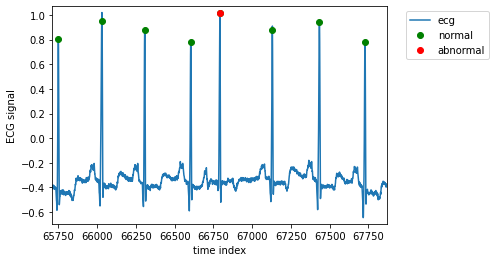

In [79]:
left = ab_index[1]-1080
right = ab_index[1]+1080

plt.plot(x[left:right],p_signal[left:right,0],'-',label='ecg',)
plt.plot(x[atr_sample],p_signal[atr_sample,0],'go',label ='normal')
plt.plot(x[ab_index],p_signal[ab_index,0],'ro',label='abnormal')

plt.xlim(left,right)
plt.ylim(p_signal[left:right].min()-0.05,p_signal[left:right,0].max()+0.05)
plt.xlabel('time index')
plt.ylabel('ECG signal')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.show()

In [80]:
def make_dataset(pts, num_sec, fs, abnormal):
    # function for making dataset ignoring non-beats
    # input:
    # pts - list of patients
    # num_sec = number of seconds to include before and after the beat
    # fs = frequency
    # output: 
    #   X_all = signal (nbeats , num_sec * fs columns)
    #   Y_all = binary is abnormal (nbeats, 1)
    #   sym_all = beat annotation symbol (nbeats,1)
    
    # initialize numpy arrays
    num_cols = 2*num_sec * fs
    X_all = np.zeros((1,num_cols))
    Y_all = np.zeros((1,1))
    sym_all = []
    
    # list to keep track of number of beats across patients
    max_rows = []
    
    for pt in pts:
        file = data_path + pt
        
        p_signal, atr_sym, atr_sample = load_ecg(file)
        
        # grab the first signal
        p_signal = p_signal[:,0]
        
        # make df to exclude the nonbeats
        df_ann = pd.DataFrame({'atr_sym':atr_sym,
                              'atr_sample':atr_sample})
        df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal + ['N'])]
        
        X,Y,sym = build_XY(p_signal,df_ann, num_cols, abnormal)
        sym_all = sym_all+sym
        max_rows.append(X.shape[0])
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)
    # drop the first zero row
    X_all = X_all[1:,:]
    Y_all = Y_all[1:,:]
    
    # check sizes make sense
    assert np.sum(max_rows) == X_all.shape[0], 'number of X, max_rows rows messed up'
    assert Y_all.shape[0] == X_all.shape[0], 'number of X, Y rows messed up'
    assert Y_all.shape[0] == len(sym_all), 'number of Y, sym rows messed up'

    return X_all, Y_all, sym_all

def build_XY(p_signal, df_ann, num_cols, abnormal):
    # this function builds the X,Y matrices for each beat
    # it also returns the original symbols for Y
    
    num_rows = len(df_ann)

    X = np.zeros((num_rows, num_cols))
    Y = np.zeros((num_rows,1))
    sym = []
    
    # keep track of rows
    max_row = 0

    for atr_sample, atr_sym in zip(df_ann.atr_sample.values,df_ann.atr_sym.values):

        left = max([0,(atr_sample - num_sec*fs) ])
        right = min([len(p_signal),(atr_sample + num_sec*fs) ])
        x = p_signal[left: right]
        if len(x) == num_cols:
            X[max_row,:] = x
            Y[max_row,:] = int(atr_sym in abnormal)
            sym.append(atr_sym)
            max_row += 1
    X = X[:max_row,:]
    Y = Y[:max_row,:]
    return X,Y,sym

In [81]:
num_sec = 3
fs = 360

In [82]:
X_all, Y_all, sym_all = make_dataset(patients, num_sec, fs, abnormal)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

In [84]:
example=pd.Series(X_all[1]) #6 second window

<AxesSubplot:>

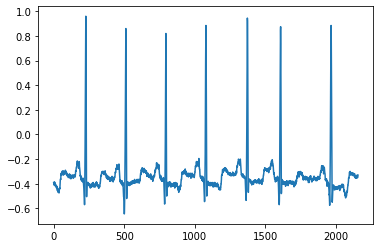

In [85]:
example.plot()

In [86]:
sym_all[2]

'N'

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
#from keras.utils import to_categorical

In [88]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation = 'sigmoid'))

In [89]:
model.compile(
                loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [90]:
model.fit(X_train, y_train, batch_size = 32, epochs= 5, verbose = 1)

Epoch 1/5
2146/2146 [==============================] - 13s 990us/step - loss: 0.1855 - accuracy: 0.9426
Epoch 2/5
2146/2146 [==============================] - 2s 876us/step - loss: 0.1370 - accuracy: 0.9598
Epoch 3/5
2146/2146 [==============================] - 2s 865us/step - loss: 0.1237 - accuracy: 0.9635
Epoch 4/5
2146/2146 [==============================] - 2s 898us/step - loss: 0.1126 - accuracy: 0.9667
Epoch 5/5
2146/2146 [==============================] - 2s 897us/step - loss: 0.1101 - accuracy: 0.9675


In [109]:
# reshape input to be [samples, time steps, features = 1]
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid_cnn = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

print(X_train_cnn.shape)
print(X_valid_cnn.shape)

(73096, 2160, 1)
(36003, 2160, 1)


In [110]:
from keras.layers import Conv1D

In [111]:
model = Sequential()
model.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu', input_shape = (2160,1)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

# compile the model - use categorical crossentropy, and the adam optimizer
model.compile(
                loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [112]:
model.fit(X_train_cnn, y_train, batch_size = 32, epochs= 2, verbose = 1)

Epoch 1/2
2285/2285 [==============================] - 344s 149ms/step - loss: 0.2091 - accuracy: 0.9268
Epoch 2/2
2285/2285 [==============================] - 342s 150ms/step - loss: 0.1265 - accuracy: 0.9615


In [113]:
model.save("cnn.h5")